In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br> 

#### 1. Prepare train & test data (MNIST)

#### Train & Test split

In [2]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

print(train_data.shape) # # of training data == 60000, each data = 28px * 28px
print(test_data.shape) # # of test data == 10000
print(train_data.dtype) # int
print(train_data.max()) # 0~255

(60000, 28, 28)
(10000, 28, 28)
uint8
255


#### Normalization

In [3]:
train_data = train_data.reshape(60000, 784).astype('float32') / 255.0 # 0~255 -> 0~1
test_data = test_data.reshape(10000, 784).astype('float32') / 255.0 # 0~255 -> 0~1

#### One-hot encoding

In [4]:
train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

<br> 

#### 2. Build the model & Set the criterion

In [5]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=28*28, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=10, activation='softmax')) # 0~9 

In [6]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

<br> 

#### 3. Train the model

In [7]:
history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 69us/sample - loss: 0.3101 - categorical_accuracy: 0.9061 - val_loss: 0.1358 - val_categorical_accuracy: 0.9593
Epoch 2/15
48000/48000 [==============================] - 3s 53us/sample - loss: 0.1402 - categorical_accuracy: 0.9575 - val_loss: 0.0938 - val_categorical_accuracy: 0.9721
Epoch 3/15
48000/48000 [==============================] - 3s 53us/sample - loss: 0.1045 - categorical_accuracy: 0.9672 - val_loss: 0.1031 - val_categorical_accuracy: 0.9688
Epoch 4/15
48000/48000 [==============================] - 3s 52us/sample - loss: 0.0836 - categorical_accuracy: 0.9738 - val_loss: 0.0786 - val_categorical_accuracy: 0.9759
Epoch 5/15
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0723 - categorical_accuracy: 0.9764 - val_loss: 0.0801 - val_categorical_accuracy: 0.9757
Epoch 6/15
48000/48000 [==============================] - 3s 54us/sample - loss: 0.05

<br> 

#### 4. Test the model

In [8]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0668 - categorical_accuracy: 0.9821
loss (cross-entropy) : 0.06684740672469161
test accuracy : 0.9821


<br> 

#### 5. Visualize the result

In [9]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

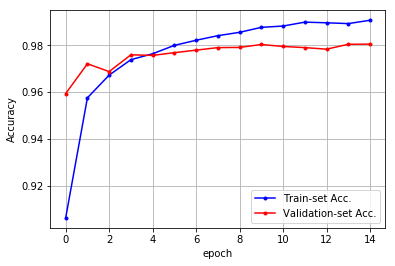

In [13]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()